**Exercise 11.21**.  In Chapters 5–8, we investigated an IMA(1,1) model for the logarithms of monthly oil prices.  Exhibit 8.3 on page 178 suggested that there may be several outliers in this series.  Investigate the IMA(1,1) model for this series for outliers using the techniques developed in this chapter.  Be sure to compare your results with those obtained earlier that ignored the outliers. The data are in the file named `oil.price`.

**Solution**.

In [1]:
require(data.table)
require(lmtest)

Loading required package: data.table

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
Y <- log(fread('../data/oil.price.dat')[['oil.price']])

In [3]:
model_m1 = arima(Y, c(0, 1, 1))
print(model_m1)
coeftest(model_m1)


Call:
arima(x = Y, order = c(0, 1, 1))

Coefficients:
         ma1
      0.2956
s.e.  0.0693

sigma^2 estimated as 0.006689:  log likelihood = 260.29,  aic = -516.58



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)    
ma1 0.295600   0.069347  4.2626 2.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


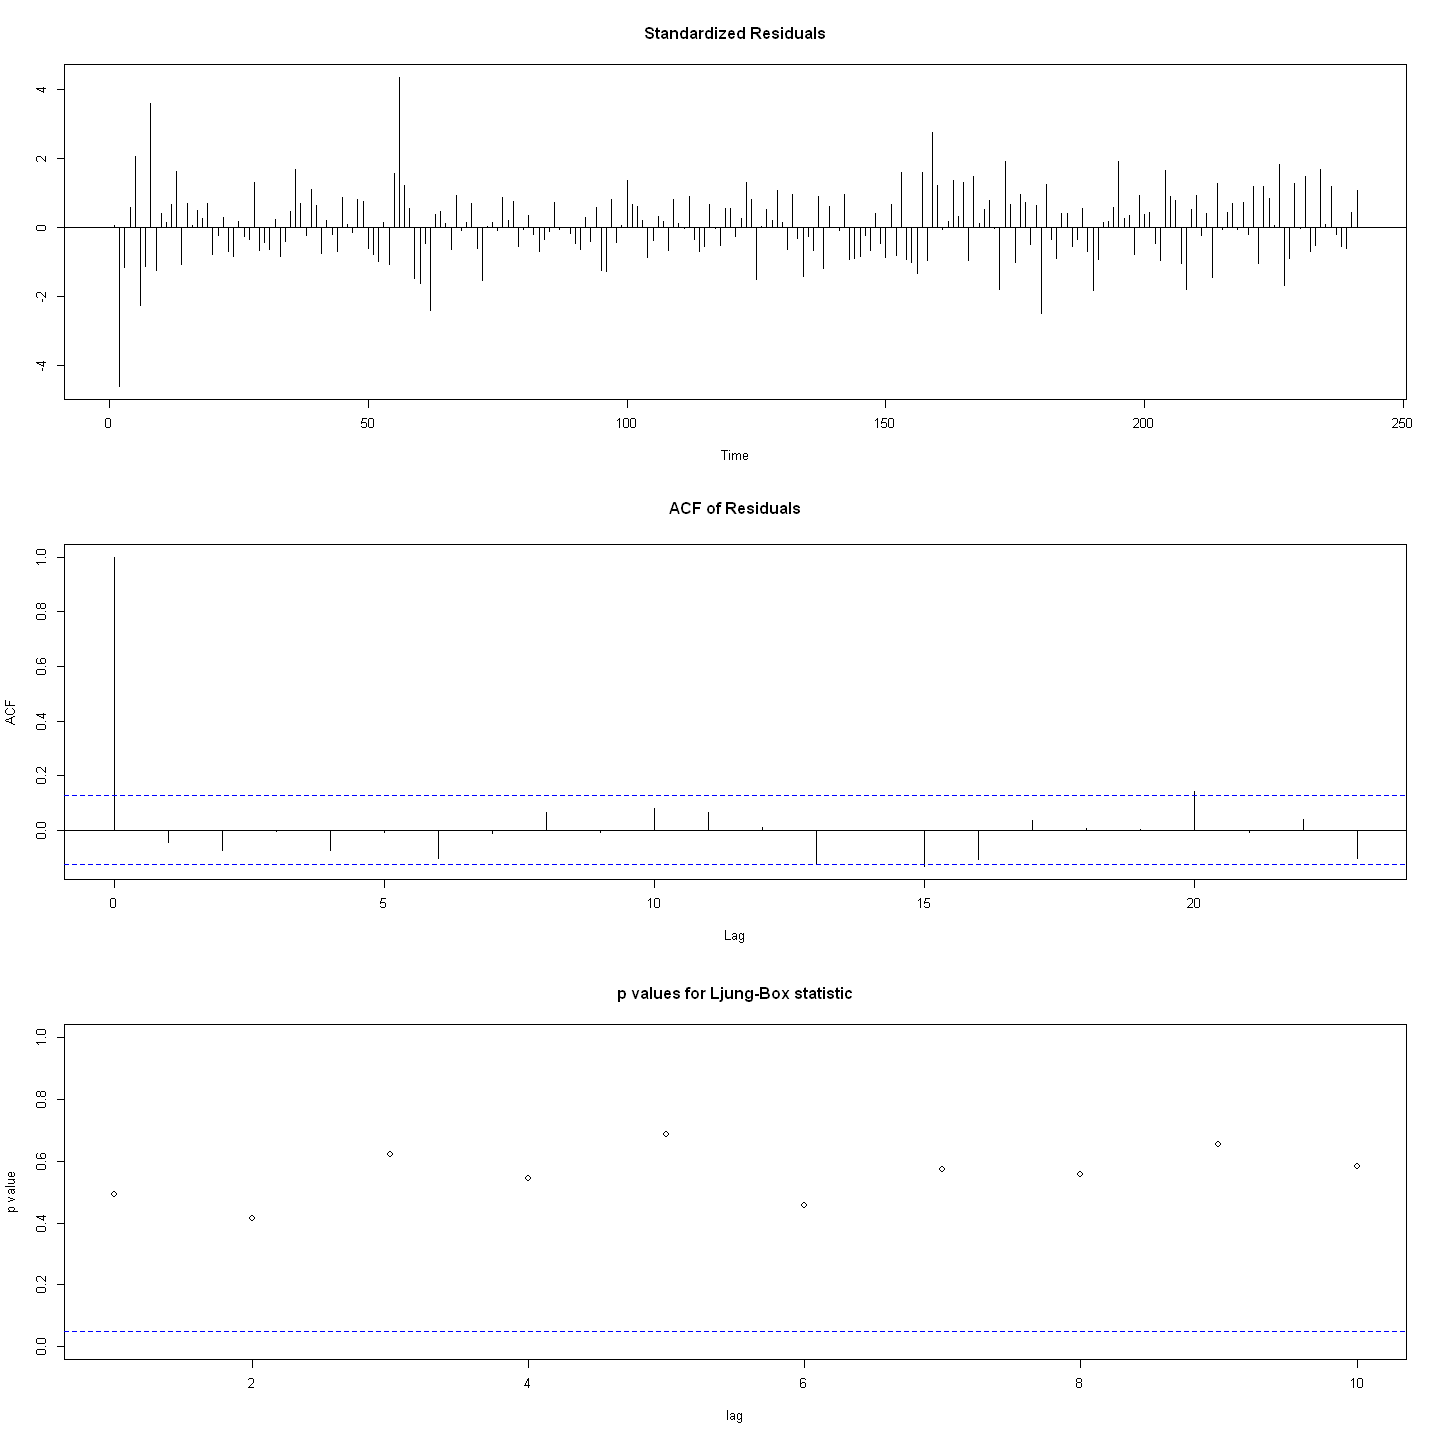

In [4]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model_m1)

In [5]:
source('outlier_detection.R')

In [6]:
detectAO(model_m1)

             [,1]     [,2]     [,3]
ind      2.000000 8.000000 56.00000
lambda2 -4.326086 4.007243  4.07535


In [7]:
detectIO(model_m1)

             [,1]     [,2]      [,3]
ind      2.000000 8.000000 56.000000
lambda1 -4.875561 3.773707  4.570056


We will set IO outliers on index 56, and an AO outlier on indexes 2 and 8.

In [8]:
xreg = data.table(
    IO_56 = rep(0, length(Y)),
    AO_2 = rep(0, length(Y)),
    AO_8 = rep(0, length(Y))
)
xreg[['IO_56']][56] = 1
xreg[['AO_2']][2:length(Y)] = 1
xreg[['AO_8']][8:length(Y)] = 1

In [9]:
model_m2 = arima(Y, c(0, 1, 1), xreg=xreg)
print(model_m2)
coeftest(model_m2)


Call:
arima(x = Y, order = c(0, 1, 1), xreg = xreg)

Coefficients:
         ma1   IO_56     AO_2    AO_8
      0.2940  0.0886  -0.3388  0.2974
s.e.  0.0665  0.0450   0.0763  0.0723

sigma^2 estimated as 0.005715:  log likelihood = 279.18,  aic = -548.35



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ma1    0.294013   0.066540  4.4186 9.934e-06 ***
IO_56  0.088607   0.044960  1.9708   0.04875 *  
AO_2  -0.338814   0.076325 -4.4391 9.034e-06 ***
AO_8   0.297446   0.072305  4.1138 3.892e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [10]:
detectAO(model_m2)

[1] "No AO detected"


In [11]:
detectIO(model_m2)

[1] "No IO detected"


All coefficients are significant and no further outliers were detected, so we will keep the model.